# Capstone week 5 assignment part 2 by Roy Lachica

We will analyse boroughs in Oslo Norway by testign correlations between depression and factors such as 
* Share of borough population with high income
* Share of borough population with low income
* Share of borough population with high education level
* Share of borough population on social security among population age 50-59.
* Living distance to nature, parks, outdoor and green areas.
* Number of foursquare venues


**First import some required libraries**

In [1]:
import pandas as pd
import numpy as np
import requests

**Define locations and nature access scores for each borough as I could not find online datasets for it.**

In [2]:
boroughs_array = np.array([
    ["Alna","59.935015","10.881657",40],
    ["Bjerke","59.937422","10.821668",30],
    ["Frogner","59.916131","10.706230",25],
    ["Gamle Oslo","59.910543","10.765616",25],  
    ["Grorud","59.957500","10.880833",60],    
    ["Grünerløkka","59.924934","10.770492",20],    
    ["Nordre Aker","59.9572374","10.76628",53],
    ["Nordstrand","59.861111","10.800278",37],
    ["Sagene","59.937222","10.756111",24],
    ["St. Hanshaugen","59.927106","10.741061",26],
    ["Stovner","59.961111","10.926667",42],
    ["Søndre Nordstrand","59.832958","10.819148",49],
    ["Ullern","59.928551","10.662471",24],
    ["Vestre Aker","59.943003","10.658020",63],
    ["Østensjø","59.888889","10.833611",64],
    ["Sentrum","59.910820","10.739924",14]   
])
boroughs_array.shape

(16, 4)

**Convert array to dataframe, do some data type conversions and define column headers etc.**

In [3]:
boroughs = pd.DataFrame({'Borough': boroughs_array[:, 0], 'Latitude': boroughs_array[:, 1], 'Longitude': boroughs_array[:, 2], 'NatureClose': boroughs_array[:, 3]})
boroughs["Latitude"] = pd.to_numeric(boroughs["Latitude"])
boroughs["Longitude"] = pd.to_numeric(boroughs["Longitude"])
boroughs["NatureClose"] = pd.to_numeric(boroughs["NatureClose"])
boroughs.set_index('Borough')
boroughs

,Borough,Latitude,Longitude,NatureClose
0,Alna,59.935015,10.881657,40
1,Bjerke,59.937422,10.821668,30
2,Frogner,59.916131,10.706230,25
3,Gamle Oslo,59.910543,10.765616,25
4,Grorud,59.957500,10.880833,60
5,Grünerløkka,59.924934,10.770492,20
6,Nordre Aker,59.957237,10.766280,53
7,Nordstrand,59.861111,10.800278,37
8,Sagene,59.937222,10.756111,24
9,St. Hanshaugen,59.927106,10.741061,26


**Define a function we will reuse to draw barcharts**

In [4]:
import warnings
import matplotlib.cbook

def drawbarchart(xvar,yvar,df,xaxislabel):
    warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
    x = df.sort_values(yvar)
    ax = x.plot(kind='barh', x=xvar,y=yvar,figsize=(8, 6),  zorder=2, width=0.85)

    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_legend().remove()

    # Switch off ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw vertical axis lines
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#cccccc', zorder=1)

    # Set x-axis label
    ax.set_xlabel(xaxislabel, labelpad=20,  size=12)

    # Set y-axis label
    ax.set_ylabel("Borough", labelpad=20, size=12)

**Load data on education for boroughs**

In [5]:
education_path="http://statistikkbanken.oslo.kommune.no/webview/velocity?headers=Utdanning&Geografisubset=30100%2C30101+-+30118&stubs=Geografi&Utdanningslice=10&measure=common&virtualslice=Antall_value&layers=r&layers=Kjnn&layers=Alder&layers=virtual&study=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfStudy%2FBefokningen-etter-alder-kjonn-utdanning-2017&Aldersubset=7&Alderslice=7&mode=cube&Geografislice=30100&virtualsubset=Antall_value&v=2&rsubset=2018&measuretype=4&Kjnnsubset=3&rslice=2018&cube=http%3A%2F%2Fstatistikkbanken.oslo.kommune.no%3A80%2Fobj%2FfCube%2FBefokningen-etter-alder-kjonn-utdanning-2017_C1&Utdanningsubset=10%2C4&Kjnnslice=3&top=yes&executespreadsheet=true"
education = pd.read_excel(education_path,skiprows=11,names=["Borough","TotalEducation","TopEducation"])
education.replace({'Bydel ':''}, regex=True,inplace=True)
education['Borough'] = education['Borough'].str.strip()
educationShare = education
educationShare['PctTopEducation'] = (educationShare['TopEducation'] / educationShare['TotalEducation']) *100
educationShare.set_index('Borough')
educationShare.head()

,Borough,TotalEducation,TopEducation,PctTopEducation
0,Gamle Oslo,47023,10154,21.593688
1,Grünerløkka,52740,12098,22.938946
2,Sagene,38035,10186,26.780597
3,St. Hanshaugen,34059,9418,27.652016
4,Frogner,52624,14278,27.132107


**Load data on top income for boroughs**

In [6]:
income_path="http://statistikkbanken.oslo.kommune.no/webview/velocity?headers=innt_num&stubs=geografi&innt_numslice=1&measure=common&geografislice=30101&virtualslice=brutto_sum_value&layers=kjonn_num&layers=virtual&layers=aar&aarslice=2017&study=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfStudy%2Finntektintervall-ny&kjonn_numslice=1&mode=cube&innt_numsubset=1%2C18&virtualsubset=brutto_sum_value&v=2&aar=2017&kjonn_numsubset=1&aarsubset=2007+-+2017&geografisubset=30101+-+30115&measuretype=4&cube=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfCube%2Finntektintervall-ny_C1&top=yes&executespreadsheet=true"
income = pd.read_excel(income_path,skiprows=9,names=["Borough","TotalIncome","TopIncome"])
income.replace({'Bydel ':''}, regex=True,inplace=True)
income['Borough'] = income['Borough'].str.strip()
incomeShare = income
incomeShare['PctTopIncome'] = (incomeShare['TopIncome'] / incomeShare['TotalIncome']) *100
incomeShare.set_index('Borough')
incomeShare

,Borough,TotalIncome,TopIncome,PctTopIncome
0,Gamle Oslo,27431,3241,11.815100
1,Grünerløkka,28192,3751,13.305193
2,Sagene,20390,3162,15.507602
3,St Hanshaugen,17231,3271,18.983228
4,Frogner,25006,7045,28.173238
5,Ullern,13629,5152,37.801746
6,Vestre Aker,19514,7404,37.941990
7,Nordre Aker,20681,6481,31.337943
8,Bjerke,14293,1767,12.362695
9,Grorud,12006,802,6.679993


**Load data on social security benefits population 50-59 for boroughs**

In [7]:
sociaSecurityAge50to59_path='http://statistikkbanken.oslo.kommune.no/webview/velocity?headers=r&Geografisubset=30101+-+30115&stubs=Geografi&measure=common&virtualslice=Antallpersoner_value&layers=Kjnn&layers=virtual&layers=Alder&study=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfStudy%2Fufrepensjonister-antall-bydel-kjnn-alder31.12&Aldersubset=1%2C4&Alderslice=5&mode=cube&Geografislice=30101&virtualsubset=Antallpersoner_value&v=2&rsubset=2018&Alder=5&measuretype=4&rslice=2018&Kjnnsubset=1&cube=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfCube%2Fufrepensjonister-antall-bydel-kjnn-alder31.12_C1&Kjnnslice=1&top=yes&executespreadsheet=true'
sociaSecurityAge50to59 = pd.read_excel(sociaSecurityAge50to59_path,skiprows=9,names=["Borough","SocialSec"])
sociaSecurityAge50to59.replace({'Bydel ':''}, regex=True,inplace=True)
sociaSecurityAge50to59["SocialSec"] = pd.to_numeric(sociaSecurityAge50to59["SocialSec"])
sociaSecurityAge50to59.set_index('Borough')
sociaSecurityAge50to59.head()

,Borough,SocialSec
0,Gamle Oslo,827
1,Grünerløkka,711
2,Sagene,647
3,St.Hanshaugen,354
4,Frogner,559


**Load number of inhabitants total age 50 to 59 so we can calculate percentage**

In [8]:
populationAge50to59_path='http://statistikkbanken.oslo.kommune.no/webview/velocity?headers=Alder&Bydelsubset=30101+-+30116&stubs=Bydel&measure=common&virtualslice=Antall_value&layers=Kjnn&layers=virtual&layers=r&study=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfStudy%2FBe01-Befolkningen-etter-bydel-kjonn-og-alder-SSB&Aldersubset=50+-+59&Alderslice=50&mode=cube&virtualsubset=Antall_value&v=2&r=2018&rsubset=2004+-+2020&measuretype=4&Kjnnsubset=3&rslice=2018&cube=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfCube%2FBe01-Befolkningen-etter-bydel-kjonn-og-alder-SSB_C1&Kjnnslice=3&Bydelslice=30101&top=yes&executespreadsheet=true'
populationAge50to59 = pd.read_excel(populationAge50to59_path,skiprows=9)
populationAge50to59.head()

,Bydel,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Bydel Gamle Oslo,613,592,580,575,502,523,476,457,398,439
1,Bydel Grünerløkka,526,540,457,499,476,453,391,382,378,348
2,Bydel Sagene,354,392,386,349,347,313,307,310,279,278
3,Bydel St.Hanshaugen,365,391,321,322,308,329,285,264,289,263
4,Bydel Frogner,701,689,690,666,657,663,570,614,595,560


Create new column with sum population of all ages

In [9]:
populationAge50to59["sum"]=populationAge50to59.sum(axis=1)
populationAge50to59.head()

,Bydel,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,sum
0,Bydel Gamle Oslo,613,592,580,575,502,523,476,457,398,439,5155
1,Bydel Grünerløkka,526,540,457,499,476,453,391,382,378,348,4450
2,Bydel Sagene,354,392,386,349,347,313,307,310,279,278,3315
3,Bydel St.Hanshaugen,365,391,321,322,308,329,285,264,289,263,3137
4,Bydel Frogner,701,689,690,666,657,663,570,614,595,560,6405


Clean up and remove all but the last sum column that we need 

In [10]:
pd.set_option('mode.chained_assignment', None)
populationAge50to59Cleaned=populationAge50to59
populationAge50to59Cleaned.replace({'Bydel ':''}, regex=True,inplace=True)
populationAge50to59Cleaned = populationAge50to59Cleaned.loc[:, ~populationAge50to59Cleaned.columns.str.contains('^Unnamed')]
populationAge50to59Cleaned.rename(columns={"Bydel": "Borough"},inplace=True)
populationAge50to59Cleaned.set_index('Borough')
populationAge50to59Cleaned.head()

,Borough,sum
0,Gamle Oslo,5155
1,Grünerløkka,4450
2,Sagene,3315
3,St.Hanshaugen,3137
4,Frogner,6405


Combine above datasets to create new column for percentage then remove the original columns no longer needed

In [11]:
socialSecWithPopulation = pd.merge(sociaSecurityAge50to59, populationAge50to59Cleaned, on='Borough')
socialSecWithPopulation['PctSocialSecurity'] = (socialSecWithPopulation['SocialSec'] / socialSecWithPopulation['sum']) *100
socialSecWithPopulation.drop(columns=['SocialSec', 'sum'],inplace=True)
socialSecWithPopulation.set_index('Borough')
socialSecWithPopulation.head()

,Borough,PctSocialSecurity
0,Gamle Oslo,16.042677
1,Grünerløkka,15.977528
2,Sagene,19.517345
3,St.Hanshaugen,11.284667
4,Frogner,8.727557


**Load data on low income for boroughs**

In [12]:
lowincome_path="http://statistikkbanken.oslo.kommune.no/webview/velocity?Geografisubset=30101+-+30118&stubs=Geografi&measure=common&virtualslice=AndeletterEUskala_value&layers=Husholdningstype&layers=virtual&layers=r&study=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfStudy%2Fhusholdningerfattig&mode=cube&Geografislice=30101&virtualsubset=AndeletterEUskala_value&v=2&Husholdningstypesubset=1&r=2017&rsubset=2008+-+2017&measuretype=4&cube=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfCube%2Fhusholdningerfattig_C1&rslice=2017&Husholdningstypeslice=1&top=yes&executespreadsheet=true"
lowincomeShare = pd.read_excel(lowincome_path,skiprows=8,names=["Borough","PctLowIncome"])
lowincomeShare.replace({'Bydel ':''}, regex=True,inplace=True)
lowincomeShare['Borough'] = lowincomeShare['Borough'].str.strip()
lowincomeShare["PctLowIncome"] = pd.to_numeric(lowincomeShare["PctLowIncome"])
lowincomeShare.set_index('Borough')
lowincomeShare

,Borough,PctLowIncome
0,Gamle Oslo,21.7
1,Grünerløkka,20.6
2,Sagene,17.1
3,St Hanshaugen,20.9
4,Frogner,19.0
5,Ullern,11.4
6,Vestre Aker,13.7
7,Nordre Aker,16.7
8,Bjerke,19.5
9,Grorud,19.7


**Load data on child protection services cases for boroughs**

In [13]:
childprotection_path="http://statistikkbanken.oslo.kommune.no/webview/velocity?Tiltakfunksjonslice=1&Bydelsubset=2+-+16&stubs=Bydel&measure=common&virtualslice=Delenbarnmedbarnevernstiltak_value&layers=Alder&layers=Tiltakfunksjon&layers=virtual&layers=r&study=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfStudy%2Fbarn%21barnevernstiltak&Aldersubset=1&Tiltakfunksjonsubset=1&Alderslice=1&mode=cube&virtualsubset=Delenbarnmedbarnevernstiltak_value&v=2&r=2018&rsubset=2015+-+2018&measuretype=4&rslice=2018&cube=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfCube%2Fbarn%21barnevernstiltak_C1&Bydelslice=2&top=yes&executespreadsheet=true"
childprotection = pd.read_excel(childprotection_path,skiprows=9,names=["Borough","PctChildProt"])
childprotection.replace({'Bydel ':''}, regex=True,inplace=True)
childprotection["PctChildProt"] = pd.to_numeric(childprotection["PctChildProt"])
childprotection.set_index('Borough')
childprotection.head()

,Borough,PctChildProt
0,Gamle Oslo,5.9
1,Grünerløkka,5.3
2,Sagene,4.6
3,St. Hanshaugen,3.1
4,Frogner,3.4


**Load data on life satisfaction rating for boroughs**

In [87]:
lifesatisfaction_url="http://statistikkbanken.oslo.kommune.no/webview/velocity?stubs=Region&measure=common&Regionsubset=030101a+-+030115a&virtualslice=Andel_value&layers=virtual&layers=r&study=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfStudy%2FEgenvurdert%21helse%21blant%21unge%21etter%21bydel&Regionslice=030101a&mode=cube&virtualsubset=Andel_value&v=2&r=2018&rsubset=2015+-+2018&measuretype=4&cube=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfCube%2FEgenvurdert%21helse%21blant%21unge%21etter%21bydel_C1&rslice=2018&top=yes&executespreadsheet=true"
lifesatisfaction = pd.read_excel(lifesatisfaction_url,skiprows=7,names=["Borough","PctLifeSatis"])
lifesatisfaction.replace({'Bydel ':''}, regex=True,inplace=True)
lifesatisfaction.replace({'Grunerløkka':'Grünerløkka'}, regex=True,inplace=True)
lifesatisfaction["PctLifeSatis"] = pd.to_numeric(lifesatisfaction["PctLifeSatis"])
lifesatisfaction.set_index('Borough')
lifesatisfaction

,Borough,PctLifeSatis
0,Gamle Oslo,65.7
1,Grünerløkka,66.3
2,Sagene,67.4
3,St. Hanshaugen,66.9
4,Frogner,70.2
5,Ullern,74.4
6,Vestre Aker,77.2
7,Nordre Aker,73.6
8,Bjerke,68.2
9,Grorud,65.9


**Borougs with highest life satisfaction**

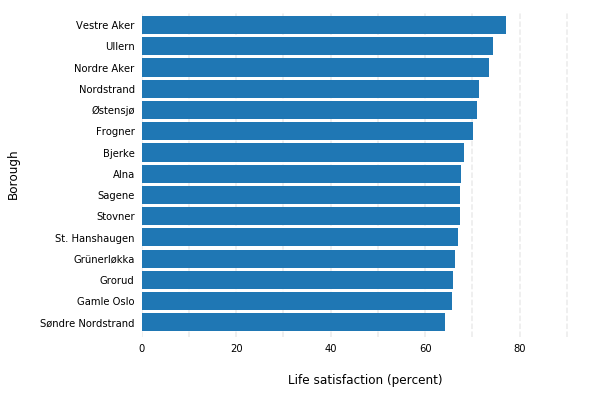

In [88]:
drawbarchart('Borough','PctLifeSatis',lifesatisfaction,'Life satisfaction (percent)')

**Load data on depression for boroughs**

In [16]:
depression_path="http://statistikkbanken.oslo.kommune.no/webview/velocity?headers=r&virtualsubset=Andel_value&v=2&stubs=Region&measure=common&virtualslice=Andel_value&Regionsubset=0301%2C030101a+-+030115a&rsubset=2015&layers=virtual&measuretype=4&study=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfStudy%2FDepresjonsplager%21hos%21unge%21etter%21bydel&cube=http%3A%2F%2F192.168.101.44%3A80%2Fobj%2FfCube%2FDepresjonsplager%21hos%21unge%21etter%21bydel_C1&mode=cube&top=yes&executespreadsheet=true"
depressionShare = pd.read_excel(depression_path,skiprows=8,names=["Borough","PctDepression"])
depressionShare['Borough'] = depressionShare['Borough'].str.strip()
depressionShare.replace({'Grunerløkka':'Grünerløkka'}, regex=True,inplace=True)
depressionShare["PctDepression"] = pd.to_numeric(depressionShare["PctDepression"])
depressionShare.set_index('Borough')
depressionShare.head()

,Borough,PctDepression
0,Gamle Oslo,18.0
1,Grünerløkka,18.8
2,Sagene,21.2
3,St. Hanshaugen,15.9
4,Frogner,19.0


**Draw barchart showing depression levels at boroughs**

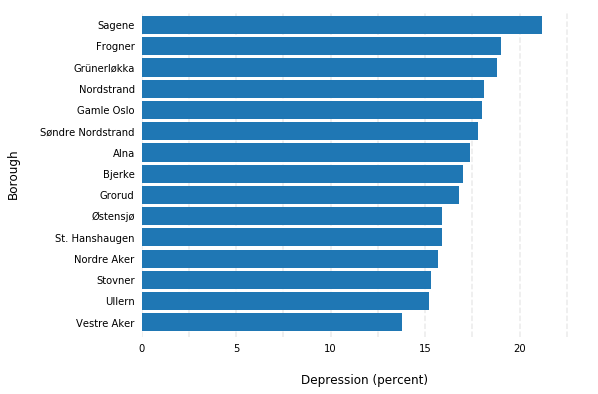

In [17]:
drawbarchart('Borough','PctDepression',depressionShare,'Depression (percent)')

# Merge datasets

**Merge dataset one by one to be able to check data quality**

In [89]:
incomeAndEducation = pd.merge(incomeShare, educationShare, on='Borough')
incomeAndEducation.drop(columns=['TotalIncome', 'TotalEducation','TopEducation','TopIncome'],inplace=True)
incomeAndEducation.set_index('Borough')
incomeAndEducation.head()

,Borough,PctTopIncome,PctTopEducation
0,Gamle Oslo,11.815100,21.593688
1,Grünerløkka,13.305193,22.938946
2,Sagene,15.507602,26.780597
3,Frogner,28.173238,27.132107
4,Ullern,37.801746,29.239422


In [90]:
incomeEducationSocialSec =  pd.merge(incomeAndEducation, socialSecWithPopulation, on='Borough')
incomeHighLowEducationSocialSec =  pd.merge(incomeEducationSocialSec,lowincomeShare, on='Borough')
incomeHighLowEducationSocialSecChildProt =  pd.merge(incomeHighLowEducationSocialSec,childprotection, on='Borough')
incomeHighLowEducationSocialSecChildProtLifesat =  pd.merge(incomeHighLowEducationSocialSecChildProt, lifesatisfaction, on='Borough') 
incomeHighLowEducationSocialSecChildProtLifesatDepression =  pd.merge(incomeHighLowEducationSocialSecChildProtLifesat, depressionShare, on='Borough') 
incomeHighLowEducationSocialSecChildProtLifesatDepression


,Borough,PctTopIncome,PctTopEducation,PctSocialSecurity,PctLowIncome,PctChildProt,PctLifeSatis,PctDepression
0,Gamle Oslo,11.815100,21.593688,16.042677,21.7,5.9,65.7,18.0
1,Grünerløkka,13.305193,22.938946,15.977528,20.6,5.3,66.3,18.8
2,Sagene,15.507602,26.780597,19.517345,17.1,4.6,67.4,21.2
3,Frogner,28.173238,27.132107,8.727557,19.0,3.4,70.2,19.0
4,Ullern,37.801746,29.239422,6.464891,11.4,2.4,74.4,15.2
5,Vestre Aker,37.941990,29.383062,7.200829,13.7,1.4,77.2,13.8
6,Nordre Aker,31.337943,28.135470,6.812895,16.7,1.6,73.6,15.7
7,Bjerke,12.362695,14.846027,13.020983,19.5,4.8,68.2,17.0
8,Grorud,6.679993,8.668841,18.994866,19.7,8.3,65.9,16.8
9,Stovner,7.620622,6.623481,17.364267,21.7,5.8,67.3,15.3


**Merge all municipalitydata sets with geography data set**

In [91]:
boroughsCombined = incomeHighLowEducationSocialSecChildProtLifesatDepression.join(boroughs.set_index('Borough'), on='Borough')
boroughsCombined.head()

,Borough,PctTopIncome,PctTopEducation,PctSocialSecurity,PctLowIncome,PctChildProt,PctLifeSatis,PctDepression,Latitude,Longitude,NatureClose
0,Gamle Oslo,11.815100,21.593688,16.042677,21.7,5.9,65.7,18.0,59.910543,10.765616,25
1,Grünerløkka,13.305193,22.938946,15.977528,20.6,5.3,66.3,18.8,59.924934,10.770492,20
2,Sagene,15.507602,26.780597,19.517345,17.1,4.6,67.4,21.2,59.937222,10.756111,24
3,Frogner,28.173238,27.132107,8.727557,19.0,3.4,70.2,19.0,59.916131,10.706230,25
4,Ullern,37.801746,29.239422,6.464891,11.4,2.4,74.4,15.2,59.928551,10.662471,24


# Display depression levels on map

**Install folium library required to display map**

In [21]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    openssl-1.1.1d             |       h516909a_0         2.1 MB  conda-forge
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following NEW packages will be 

**Setup some colors we will be using in the map below.**

In [22]:
def convert_to_rgb(minimum, maximum, value):
    minimum, maximum = float(minimum), float(maximum)    
    halfmax = (minimum + maximum) / 2
    if minimum <= value <= halfmax:
        #ok
        r = int( 255./(halfmax - minimum) * (value - minimum))
        g = 255#int( 255. + -255./(halfmax - minimum)  * (value - minimum))
        b = 0
        return (r,g,b)    
    elif halfmax < value <= maximum:
        r = 255#int( 255. + -255./(maximum - halfmax)  * (value - halfmax))  int( 255./(maximum - halfmax) * (value - halfmax))
        g = int( 255. + -255./(maximum - halfmax)  * (value - halfmax))
        b = 0
        return (r,g,b)

**Create map of Oslo**

In [24]:
map_oslo = folium.Map(location=[59.9,10.8], zoom_start=11, width=1100, height=900)

# add markers to map for each borough
for lat, lng, borough,depression in zip(boroughsCombined['Latitude'], boroughsCombined['Longitude'], boroughsCombined['Borough'], boroughsCombined['PctDepression']):
    label = '{} ({}% depression)'.format(borough,depression)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        stroke=True,
        weight=1,
        popup=label,
        color='black',
        fill_color='#%02x%02x%02x' % convert_to_rgb(13, 22, depression),
        fill=True,       
        fill_opacity=0.9,
        parse_html=False).add_to(map_oslo)  
    

In [25]:
map_oslo

# Explore borough venues in Oslo

In [26]:
# @hidden_cell
# Define API constants
CLIENT_ID = 'UZ4O1W2MKFB5EAQ5E3BCTNHWSKJOK01U2QWLZNAUHRVDJBSO' # your Foursquare ID
CLIENT_SECRET = '3PEYBVMJCOSVQUVO2RHYEEEBK1CZOM2HEUUTENBR5KGJDHA0' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [30]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 800 # define radius

**Create a function to load venues close to a geo position.**

In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

**Load Foursquare venues for all boroughs**

In [32]:
venues = getNearbyVenues(names=boroughsCombined['Borough'],
                                   latitudes=boroughsCombined['Latitude'],
                                   longitudes=boroughsCombined['Longitude']
                                  )

Gamle Oslo
Grünerløkka
Sagene
Frogner
Ullern
Vestre Aker
Nordre Aker
Bjerke
Grorud
Stovner
Alna
Østensjø
Nordstrand
Søndre Nordstrand


Check the size of the resulting venues dataframe

In [33]:
print(venues.shape)
venues.head()

(232, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Gamle Oslo,59.910543,10.765616,Oslo Mekaniske Verksted,59.911260,10.762425,Bar
1,Gamle Oslo,59.910543,10.765616,Holy Cow,59.910929,10.761418,Indian Restaurant
2,Gamle Oslo,59.910543,10.765616,Siste Sang,59.911697,10.766618,Beer Store
3,Gamle Oslo,59.910543,10.765616,Maaemo,59.910431,10.760291,Scandinavian Restaurant
4,Gamle Oslo,59.910543,10.765616,Olympen,59.912307,10.764540,Bar


Check how many venues were returned for each borough

In [34]:
venue_count= venues.groupby('Borough').count()

Check how many unique categories can be curated from all the returned venues

In [35]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 86 uniques categories.


**Setup dataframe with the number of vanues by borough**

In [36]:
venue_count.reset_index(inplace=True)
venue_count = venue_count[['Borough','Venue']]
venue_count.rename(columns={"Venue": "VenuesCount"},inplace=True)
venue_count

,Borough,VenuesCount
0,Alna,6
1,Bjerke,5
2,Frogner,44
3,Gamle Oslo,61
4,Grorud,8
5,Grünerløkka,30
6,Nordre Aker,5
7,Nordstrand,16
8,Sagene,35
9,Stovner,6


## Merge venues count with other datasets

**Merge the data with our boroughs dataset and fix the Neighbourhood column name so it can be merged again later on column key with correct name**

In [118]:
venues_complete = pd.merge(boroughsCombined, venue_count, on='Borough') 
venues_complete

,Borough,PctTopIncome,PctTopEducation,PctSocialSecurity,PctLowIncome,PctChildProt,PctLifeSatis,PctDepression,Latitude,Longitude,NatureClose,VenuesCount
0,Gamle Oslo,11.815100,21.593688,16.042677,21.7,5.9,65.7,18.0,59.910543,10.765616,25,61
1,Grünerløkka,13.305193,22.938946,15.977528,20.6,5.3,66.3,18.8,59.924934,10.770492,20,30
2,Sagene,15.507602,26.780597,19.517345,17.1,4.6,67.4,21.2,59.937222,10.756111,24,35
3,Frogner,28.173238,27.132107,8.727557,19.0,3.4,70.2,19.0,59.916131,10.706230,25,44
4,Ullern,37.801746,29.239422,6.464891,11.4,2.4,74.4,15.2,59.928551,10.662471,24,6
5,Vestre Aker,37.941990,29.383062,7.200829,13.7,1.4,77.2,13.8,59.943003,10.658020,63,7
6,Nordre Aker,31.337943,28.135470,6.812895,16.7,1.6,73.6,15.7,59.957237,10.766280,53,5
7,Bjerke,12.362695,14.846027,13.020983,19.5,4.8,68.2,17.0,59.937422,10.821668,30,5
8,Grorud,6.679993,8.668841,18.994866,19.7,8.3,65.9,16.8,59.957500,10.880833,60,8
9,Stovner,7.620622,6.623481,17.364267,21.7,5.8,67.3,15.3,59.961111,10.926667,42,6


In [38]:
df=venues_complete

# Analyse data

**Explore correlations by setting up a correlation matrix.**  
First check datatypes of all columns to make sure correlation matrix can be calculated

In [39]:
venues_complete.dtypes

Borough               object
PctTopIncome         float64
PctTopEducation      float64
PctSocialSecurity    float64
PctLowIncome         float64
PctChildProt         float64
PctLifeSatis         float64
PctDepression        float64
Latitude             float64
Longitude            float64
NatureClose            int64
VenuesCount            int64
dtype: object

Remove geo data that would not be useful in the matrix.

In [92]:
df=venues_complete.drop(columns=['Latitude', 'Longitude','Borough'])
corr = df.corr(method ='pearson') 
corr

,ClusterId,PctTopIncome,PctTopEducation,PctSocialSecurity,PctLowIncome,PctChildProt,PctLifeSatis,PctDepression,NatureClose,VenuesCount
ClusterId,1.000000,0.656045,0.636974,-0.491502,-0.633898,-0.602618,0.515050,0.308925,-0.189740,0.247565
PctTopIncome,0.656045,1.000000,0.815645,-0.921622,-0.829498,-0.896825,0.930410,-0.378482,0.055724,-0.066044
PctTopEducation,0.636974,0.815645,1.000000,-0.675807,-0.559340,-0.727500,0.665809,0.028198,-0.276622,0.362110
PctSocialSecurity,-0.491502,-0.921622,-0.675807,1.000000,0.664580,0.825854,-0.833208,0.460796,-0.084162,0.129800
PctLowIncome,-0.633898,-0.829498,-0.559340,0.664580,1.000000,0.746824,-0.827248,0.293605,-0.079033,0.281871
PctChildProt,-0.602618,-0.896825,-0.727500,0.825854,0.746824,1.000000,-0.886211,0.329474,-0.035018,0.155173
PctLifeSatis,0.515050,0.930410,0.665809,-0.833208,-0.827248,-0.886211,1.000000,-0.583104,0.246875,-0.272989
PctDepression,0.308925,-0.378482,0.028198,0.460796,0.293605,0.329474,-0.583104,1.000000,-0.603416,0.610814
NatureClose,-0.189740,0.055724,-0.276622,-0.084162,-0.079033,-0.035018,0.246875,-0.603416,1.000000,-0.608887
VenuesCount,0.247565,-0.066044,0.362110,0.129800,0.281871,0.155173,-0.272989,0.610814,-0.608887,1.000000


**Visualize correlation matrix**

In [93]:
import seaborn as sns; 
from scipy import stats
from itertools import product

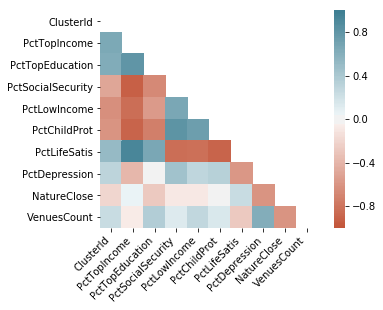

In [94]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))

ax = sns.heatmap(
    corr, 
    mask=mask,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

**Filter and list only top correlations with statistical significance**  

In [95]:
# list intersections with statistics significance
already_checked = [""] # keep track of combinations already checked

df_corr = pd.DataFrame() # Correlation matrix
df_p = pd.DataFrame()  # Matrix of p-values
for x in df.columns:
    for y in df.columns:
        corr = stats.pearsonr(df[x], df[y])
        if (corr[1]<0.05 and abs(corr[0])>0.4 and x!=y):
            #if (not x in already_checked and not y in already_checked):
            #    print('already added')
            isAlreadyAdded=False
            for item in already_checked:
                if item.find(x)  >-1 and item.find(y) >-1:    
                     #print(x+'-'+y+' already added')
                     isAlreadyAdded=True
                     break
            #    else: 
            #        #print('%x-{0}:  corr:{0} p-value:{0}\n\n',x,y,corr[0],corr[1])
            #        print(x+'-'+y+'\t corr:% 5.2f pvalue:% f\n' %(corr[0],corr[1]))
            if (not isAlreadyAdded):
                already_checked.append(x+'-'+y)
                print(x+' vs '+y+'\t corr:% 5.2f pvalue:% f' %(corr[0],corr[1]))              

ClusterId vs PctTopIncome	 corr: 0.66 pvalue: 0.014891
ClusterId vs PctTopEducation	 corr: 0.64 pvalue: 0.019215
ClusterId vs PctLowIncome	 corr:-0.63 pvalue: 0.019991
ClusterId vs PctChildProt	 corr:-0.60 pvalue: 0.029272
PctTopIncome vs PctTopEducation	 corr: 0.82 pvalue: 0.000676
PctTopIncome vs PctSocialSecurity	 corr:-0.92 pvalue: 0.000008
PctTopIncome vs PctLowIncome	 corr:-0.83 pvalue: 0.000453
PctTopIncome vs PctChildProt	 corr:-0.90 pvalue: 0.000033
PctTopIncome vs PctLifeSatis	 corr: 0.93 pvalue: 0.000004
PctTopEducation vs PctSocialSecurity	 corr:-0.68 pvalue: 0.011228
PctTopEducation vs PctLowIncome	 corr:-0.56 pvalue: 0.046869
PctTopEducation vs PctChildProt	 corr:-0.73 pvalue: 0.004826
PctTopEducation vs PctLifeSatis	 corr: 0.67 pvalue: 0.012984
PctSocialSecurity vs PctLowIncome	 corr: 0.66 pvalue: 0.013213
PctSocialSecurity vs PctChildProt	 corr: 0.83 pvalue: 0.000505
PctSocialSecurity vs PctLifeSatis	 corr:-0.83 pvalue: 0.000404
PctLowIncome vs PctChildProt	 corr: 0.75 

## Investigate top correlations

Check detailed correlation and p-value for the top identified correlations found in the correlation matrix above (squares with the deepest colors)

Import seaborn which is really nice for plotting correlation with trendline


In [96]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### High income vs depression

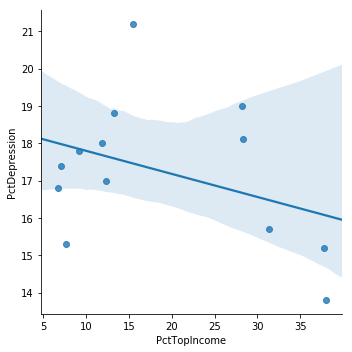

In [97]:
sns.lmplot(x="PctTopIncome", y="PctDepression", data=venues_complete);

In [98]:
pearsonr(venues_complete["PctTopIncome"], venues_complete["PctDepression"])

(-0.37848174852572986, 0.20222959097241555)

Results: Not statistical significant

### High education level vs depression

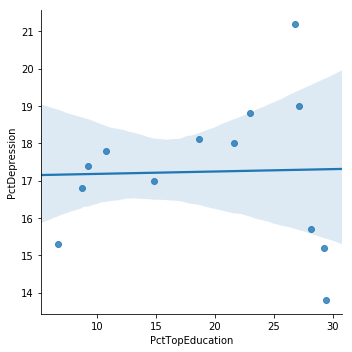

In [99]:
sns.lmplot(x="PctTopEducation", y="PctDepression", data=venues_complete);

In [100]:
pearsonr(venues_complete["PctTopEducation"], venues_complete["PctDepression"])

(0.028198042774297608, 0.9271414293667868)

Results: Not statistical significant

### Number of venues vs depression

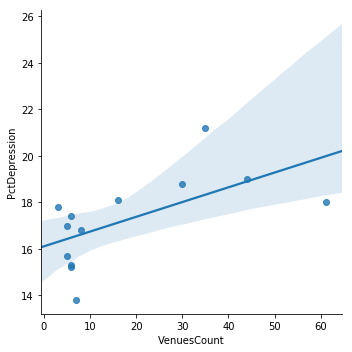

In [101]:
sns.lmplot(x="VenuesCount", y="PctDepression", data=venues_complete);

In [102]:
pearsonr(venues_complete["VenuesCount"], venues_complete["PctDepression"])

(0.6108142024181022, 0.026584296096659545)

Results: Statistical significant

### Low income vs depression

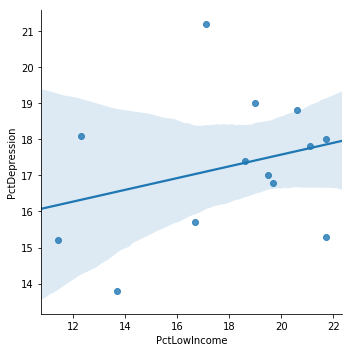

In [103]:
sns.lmplot(x="PctLowIncome", y="PctDepression", data=venues_complete);

In [104]:
pearsonr(venues_complete["PctLowIncome"], venues_complete["PctDepression"])

(0.2936045135606397, 0.33024071968582386)

Results: Not statistical significant

### Foursquare venues vs depression

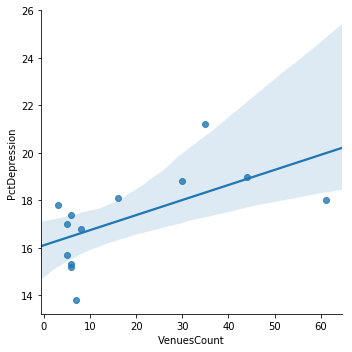

In [139]:
sns.lmplot(x="VenuesCount", y="PctDepression", data=venues_complete);

In [140]:
pearsonr(venues_complete["VenuesCount"], venues_complete["PctDepression"])

(0.6108142024181022, 0.026584296096659545)

In [ ]:
Results: Statistical significant

### Access to nature vs nature closeness

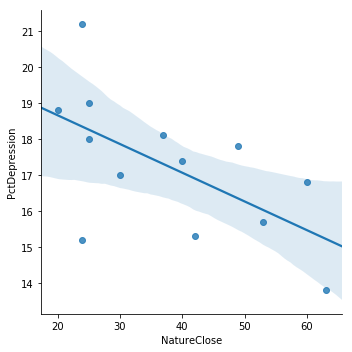

In [106]:
sns.lmplot(x="NatureClose", y="PctDepression", data=venues_complete);

In [107]:
pearsonr(venues_complete["NatureClose"], venues_complete["PctDepression"])

(-0.6034159010012522, 0.029001764164339718)

Results: Not statistical significant

### Share of low income population vs child protection cases

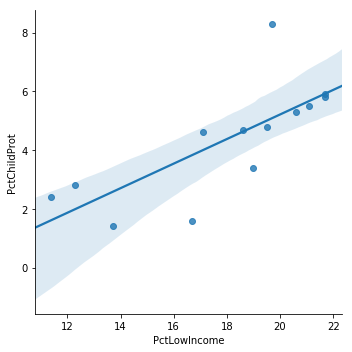

In [108]:
sns.lmplot(x="PctLowIncome", y="PctChildProt", data=venues_complete);

In [109]:
pearsonr(venues_complete["PctLowIncome"], venues_complete["PctChildProt"])

(0.74682390133194, 0.003354872604312491)

Results: High correlation and statistical significant

### Life satisfaction averages vs low income

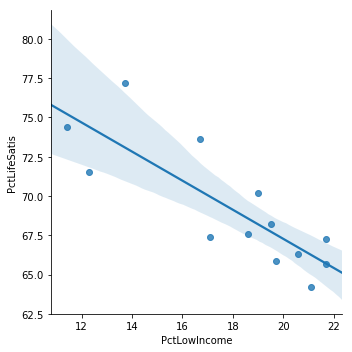

In [110]:
sns.lmplot(x="PctLowIncome",y="PctLifeSatis", data=venues_complete)

In [111]:
pearsonr(venues_complete["PctLowIncome"], venues_complete["PctLifeSatis"])

(-0.8272476939906243, 0.0004842605858483919)

Results: High correlation and statistical significant

### Life satisfaction averages vs child protection cases

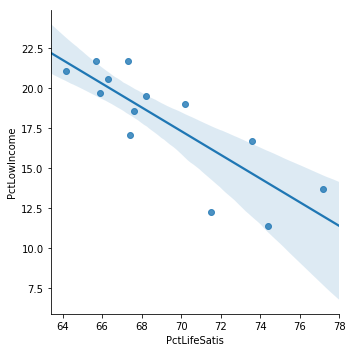

In [112]:
sns.lmplot(x="PctLifeSatis",y="PctLowIncome", data=venues_complete)

### Boroughs K-means clustering

In [129]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(venues_complete[["PctDepression","PctLifeSatis"]])

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 2, 2, 1, 1, 1, 0, 0, 0], dtype=int32)

In [130]:
# add clustering labels
dfclustered=venues_complete.copy()
dfclustered.insert(0, 'ClusterId', kmeans.labels_)
dfclustered


,ClusterId,Borough,PctTopIncome,PctTopEducation,PctSocialSecurity,PctLowIncome,PctChildProt,PctLifeSatis,PctDepression,Latitude,Longitude,NatureClose,VenuesCount
0,0,Gamle Oslo,11.815100,21.593688,16.042677,21.7,5.9,65.7,18.0,59.910543,10.765616,25,61
1,0,Grünerløkka,13.305193,22.938946,15.977528,20.6,5.3,66.3,18.8,59.924934,10.770492,20,30
2,2,Sagene,15.507602,26.780597,19.517345,17.1,4.6,67.4,21.2,59.937222,10.756111,24,35
3,2,Frogner,28.173238,27.132107,8.727557,19.0,3.4,70.2,19.0,59.916131,10.706230,25,44
4,1,Ullern,37.801746,29.239422,6.464891,11.4,2.4,74.4,15.2,59.928551,10.662471,24,6
5,1,Vestre Aker,37.941990,29.383062,7.200829,13.7,1.4,77.2,13.8,59.943003,10.658020,63,7
6,1,Nordre Aker,31.337943,28.135470,6.812895,16.7,1.6,73.6,15.7,59.957237,10.766280,53,5
7,0,Bjerke,12.362695,14.846027,13.020983,19.5,4.8,68.2,17.0,59.937422,10.821668,30,5
8,0,Grorud,6.679993,8.668841,18.994866,19.7,8.3,65.9,16.8,59.957500,10.880833,60,8
9,0,Stovner,7.620622,6.623481,17.364267,21.7,5.8,67.3,15.3,59.961111,10.926667,42,6


In [134]:
def clusterColor(clusterId):
     if(clusterId==0):
        return '#ff0000'
     elif(clusterId==1):
        return '#00ff00'   
     else:
        return '#ffff00'

In [135]:
import matplotlib.cm as cm
import matplotlib.colors as colors
from folium.features import DivIcon

# create map
map_clusters = folium.Map(location=[59.9,10.8], zoom_start=11, width=1100, height=900)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, borough, cluster in zip(dfclustered['Latitude'], dfclustered['Longitude'], dfclustered['Borough'], dfclustered['ClusterId']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=9,
        popup=label,
        color='black',
        fill=True,
        fill_color=clusterColor(cluster),
        fill_opacity=0.9).add_to(map_clusters)
    
    folium.map.Marker(
        [lat-0.003 , lon - 0.006],
        icon=DivIcon(icon_size=(150,36), icon_anchor=(0,0), html='<div style="font-size: 10pt">%s</div>' % borough.replace('ø','o').replace('ü','u'))).add_to(map_clusters)      


In [136]:
map_clusters

# Examine clusters

**Cluster 1**

In [141]:
dfclustered.loc[dfclustered['ClusterId'] == 0, dfclustered.columns[[1] + list(range(5, dfclustered.shape[1]))]]

,Borough,PctLowIncome,PctChildProt,PctLifeSatis,PctDepression,Latitude,Longitude,NatureClose,VenuesCount
0,Gamle Oslo,21.7,5.9,65.7,18.0,59.910543,10.765616,25,61
1,Grünerløkka,20.6,5.3,66.3,18.8,59.924934,10.770492,20,30
7,Bjerke,19.5,4.8,68.2,17.0,59.937422,10.821668,30,5
8,Grorud,19.7,8.3,65.9,16.8,59.957500,10.880833,60,8
9,Stovner,21.7,5.8,67.3,15.3,59.961111,10.926667,42,6
10,Alna,18.6,4.7,67.6,17.4,59.935015,10.881657,40,6
12,Søndre Nordstrand,21.1,5.5,64.2,17.8,59.832958,10.819148,49,3


**Cluster 2**

In [142]:
dfclustered.loc[dfclustered['ClusterId'] == 1, dfclustered.columns[[1] + list(range(5, dfclustered.shape[1]))]]

,Borough,PctLowIncome,PctChildProt,PctLifeSatis,PctDepression,Latitude,Longitude,NatureClose,VenuesCount
4,Ullern,11.4,2.4,74.4,15.2,59.928551,10.662471,24,6
5,Vestre Aker,13.7,1.4,77.2,13.8,59.943003,10.658020,63,7
6,Nordre Aker,16.7,1.6,73.6,15.7,59.957237,10.766280,53,5


**Cluster 3**

In [143]:
dfclustered.loc[dfclustered['ClusterId'] == 2, dfclustered.columns[[1] + list(range(5, dfclustered.shape[1]))]]

,Borough,PctLowIncome,PctChildProt,PctLifeSatis,PctDepression,Latitude,Longitude,NatureClose,VenuesCount
2,Sagene,17.1,4.6,67.4,21.2,59.937222,10.756111,24,35
3,Frogner,19.0,3.4,70.2,19.0,59.916131,10.706230,25,44
11,Nordstrand,12.3,2.8,71.5,18.1,59.861111,10.800278,37,16
